# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


/Users/ayush/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# LOADING DATASET AND NULL VALUE CHECK

In [2]:
# Load dataset
df = pd.read_csv('IBM_HR.csv')

# Basic information
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# IDENTIFICATION OF COLUMNS AND CATEGORICAL LABELS

In [3]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


# SPLITTING DATA FOR TRAIN TEST

In [4]:
# Split the data into features and target variable
X = df.drop('Attrition', axis=1)  # Assuming 'Attrition' is the target variable
y = df['Attrition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TESTING MODELS

In [5]:
# Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_pred)
log_roc_auc = roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1])

# Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

/Users/ayush/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ayush/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:58:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# ACCURACY AND ROC SCORE

In [6]:
# Print accuracies and ROC AUC scores
print(f"Logistic Regression Accuracy: {log_accuracy:.4f}, ROC AUC: {log_roc_auc:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}, ROC AUC: {rf_roc_auc:.4f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}, ROC AUC: {xgb_roc_auc:.4f}")

Logistic Regression Accuracy: 0.8673, ROC AUC: 0.7229
Random Forest Accuracy: 0.8810, ROC AUC: 0.7484
XGBoost Accuracy: 0.8776, ROC AUC: 0.7782


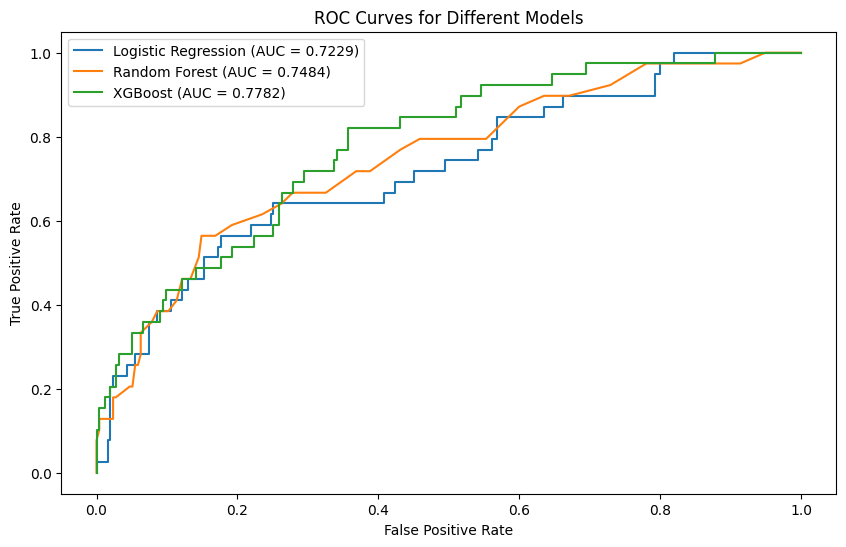

In [7]:
plt.figure(figsize=(10, 6))
fpr_log, tpr_log, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])

plt.plot(fpr_log, tpr_log, label='Logistic Regression (AUC = {:.4f})'.format(log_roc_auc))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.4f})'.format(rf_roc_auc))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.4f})'.format(xgb_roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()

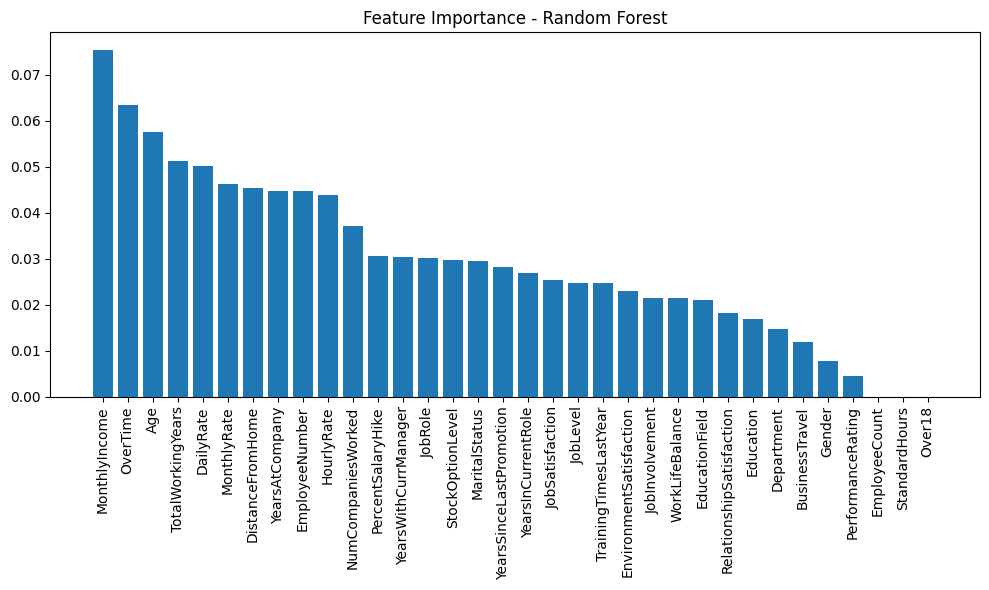

In [8]:
# Feature Importance - Random Forest
importances_rf = rf_model.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X_train.shape[1]), importances_rf[indices_rf], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices_rf], rotation=90)
plt.tight_layout()
plt.show()

### According to Random Forest, Monthly income is the most important feature. This suggests that salary is a key factor influencing whether employees choose to leave or stay at the company. Those with lower monthly incomes may be more likely to seek opportunities elsewhere.

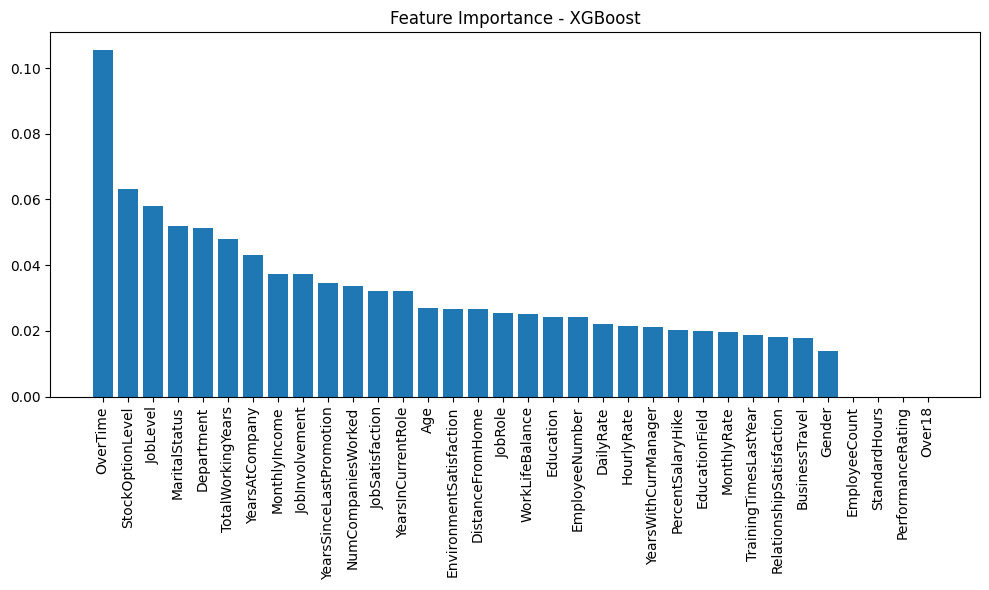

In [9]:
# Feature Importance - XGBoost
importances_xgb = xgb_model.feature_importances_
indices_xgb = np.argsort(importances_xgb)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance - XGBoost")
plt.bar(range(X_train.shape[1]), importances_xgb[indices_xgb], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices_xgb], rotation=90)
plt.tight_layout()
plt.show()

### According to XGBoost, Overtime is the most important feature.This suggests that employees who work overtime frequently might experience burnout, dissatisfaction with work-life balance, or stress, leading them to leave the organization.